# Decision Tree Regressor for Predicting House Prices

Import libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

Load dataset

In [34]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Features & Target

In [35]:
X = df.drop("MedHouseVal", axis=1)   # features
y = df["MedHouseVal"]               # target (Median House Value)

Train-Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Train Decision Tree Regressor

In [37]:
model = DecisionTreeRegressor(criterion="squared_error", max_depth=5, random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


Prediction

In [38]:
y_pred = model.predict(X_test)

Evaluation

In [39]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [40]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Squared Error: 0.5245146178314735
Root Mean Squared Error: 0.7242338143386247
R² Score: 0.5997321244428706


Plot: Actual vs Predicted

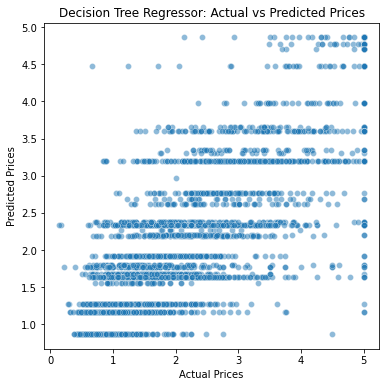

In [41]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree Regressor: Actual vs Predicted Prices")
plt.show()

Feature Importances

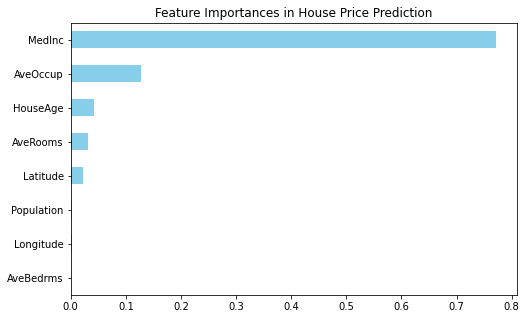

In [42]:
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
importances.sort_values().plot(kind="barh", color="skyblue")
plt.title("Feature Importances in House Price Prediction")
plt.show()

Visualize the Decision Tree (optional, small depth only)

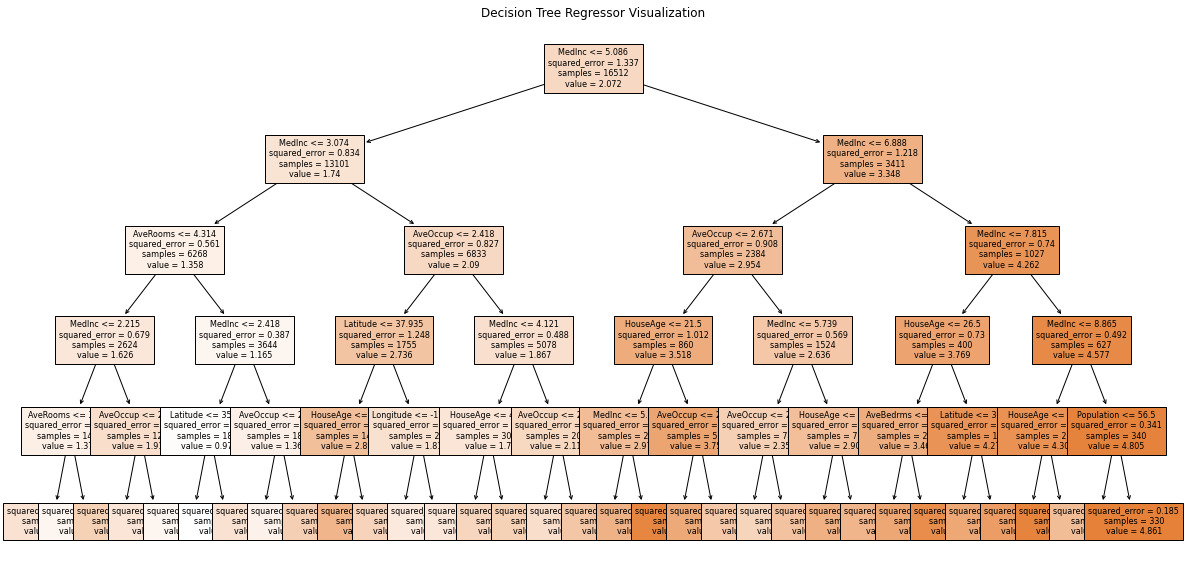

In [43]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, fontsize=8)
plt.title("Decision Tree Regressor Visualization")
plt.show()